In [4]:
%pylab inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import wget



Populating the interactive namespace from numpy and matplotlib


In [7]:
#scripted download of state level SSI data
#for x in range(2004,2016):
#    url = 'https://www.ssa.gov/policy/docs/statcomps/di_asr/'+str(x)+'/sect05.xlsx'
#    f = wget.download(url, out='.\SSI ACA data\SSI\SSI'+str(x)+'.xlsx')


100% [..........................................................] 51039 / 51039

First, a basic series is provided by the Social Security Administration on total disability population at a nationwide level from 1996 through 2015.  As a first look at the data, we will put this in a dataframe and plot it.

In [23]:
df = pd.read_excel('.\SSI ACA data\SSI\SSI2015.xlsx', sheetname='Table 66',names=['Year', 'Beneficiaries'] , skiprows=4, skip_footer=52, parse_cols='A,C')

NATL_SSI = df.set_index('Year')
NATL_SSI

,Beneficiaries
Year,
1996,7689664
1997,7811748
1998,8086259
1999,8399309
2000,8599465
2001,8791338
2002,9106014
2003,9445573
2004,9773201


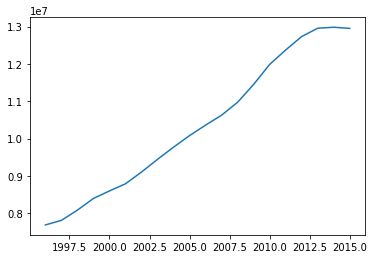

In [21]:
plt.plot (NATL_SSI.Beneficiaries)

The plot shows a distinct drop off in the growth rate of disability beneficiaries corresponding to the timeframe of interest (roughly 2013-2015 as the ACA was phased in).  However this is a raw number and further exploration is required (for instance, population adjustment).

The SSA also provides state by state data in the 2004-2015 timeframe.  However they are all in separate spreadsheets so some code is required to put the data into a proper panel.  This panel will be the basis for the SSI information I will use in my project (with additional regressors from other data sources).  Previous commented out code above in the workbook was used for a mass download from SSA.gov of this information.

In [77]:
df = pd.DataFrame()

sht = 'Table 66'
for x in range(2005, 2016):
    if x == 2007: sht = 'Table 67' #they keep changing the tab name in these sheets :(
    if x == 2013: sht = 'Table 68'
    tmp = pd.read_excel('.\SSI ACA Data\SSI\SSI'+str(x)+'.xlsx', sheetname=sht, names=['State', 'Pop', 'Beneficiaries', 'Pct_Bene'], skiprows=3, skip_footer=9, parse_cols='A, C, D, E')
    tmp['Year'] = x
    df = df.append(tmp)

df = df.fillna('US_Total')
df = df.set_index('Year')
df.to_csv(path_or_buf='.\SSI ACA Data\df.csv')

These datasheets provide state by state data, in levels and in percent of the population, for disability enrollments.  First lets re-run nationwide numbers as percentage of total population:

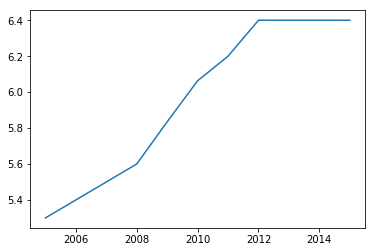

In [78]:
plt.plot(df[df.State=='US_Total'].Pct_Bene)

As a percentage of the population, we see the at-this-point well known increase in the rate of growth of disability enrollments beginning in the financial crisis era, and we also see a levelling of in roughly the ACA era.

The ACA was a federally funded program but much of the implementation (and some of the funding) was left up to the states.  With the panel data we've constructed, we can take an initial look at the effects by State.  The below states were selected blindly for this data exploration exercise, but I looked at ACA sympathetic and non ACA sympathetic states, populous and non populous just to get a sense of the variety of effects we might see.

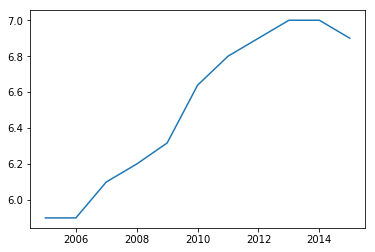

In [66]:
plt.plot(df[df.State=='Massachusetts'].Pct_Bene)

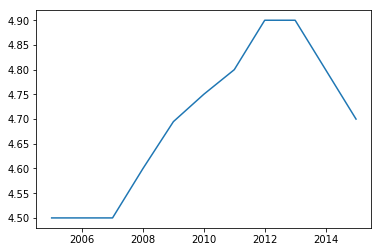

In [67]:
plt.plot(df[df.State=='California'].Pct_Bene)

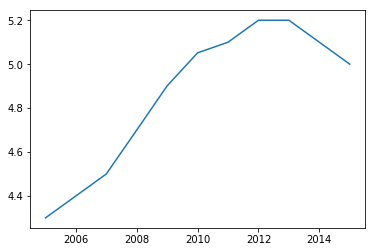

In [68]:
plt.plot(df[df.State=='Texas'].Pct_Bene)

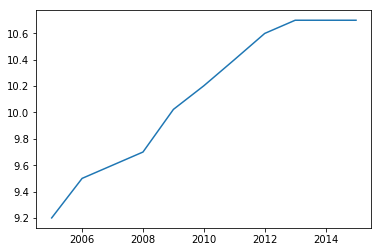

In [69]:
plt.plot(df[df.State=='Mississippi'].Pct_Bene)

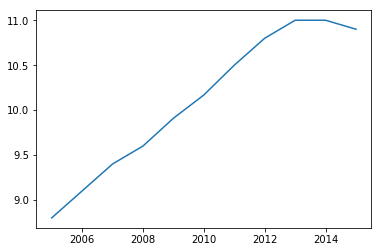

In [71]:
plt.plot(df[df.State=='Alabama'].Pct_Bene)

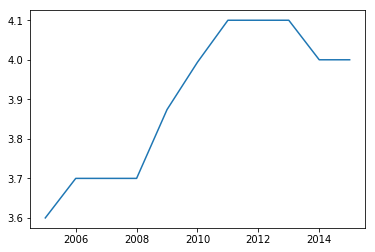

In [79]:
plt.plot(df[df.State=='Alaska'].Pct_Bene)

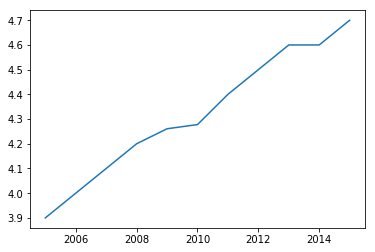

In [80]:
plt.plot(df[df.State=='Wyoming'].Pct_Bene)

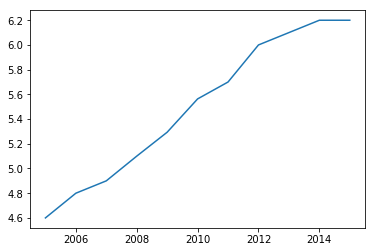

In [81]:
plt.plot(df[df.State=='Idaho'].Pct_Bene)

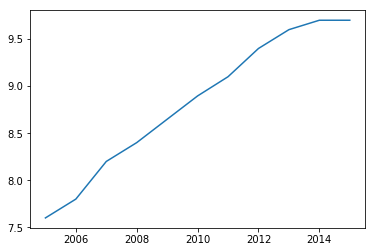

In [82]:
plt.plot(df[df.State=='Maine'].Pct_Bene)

We mostly see the same story at the state level as we do nationally, although most of the lesser-populated states show less of a leveling off or in the case of Wyoming none whatsoever.  Some of this could be population effects too, since there is free movement among the states - most likely we will want to look at percent changes in level enrollment year over year when we analyze this further in the project.  Luckily we have levels to work with as well so we can construct such a series easily.

Disability enrollments are well known to be related to overall economic conditions, so my project plan is to try various measures as potential control variables - think GDP, incomes and employment - and determine whether we still see possible ACA effects in the data (and whether they are statistically significant).  I will look at State by state data as well to determine whether effects vary by state as well as Census region and division.  Finally, I will look at the limited available State by State ACA enrollment data and run an experiment as to whether I can develop a model that can predict SSI enrollment using ACA enrollment data.